# Parastoo Javadi 4/19/21
## Project outline
### Seattle's air traffic forecast for 2021 amid covid pandemic.


[Dataset source:](https://zenodo.org/record/4670228#.YH1FdxNKhb9)
DataFrame attributes description :

Description of the dataset

One file per month is provided as a csv file with the following features:

callsign: the identifier of the flight displayed on ATC screens (usually the first three letters are reserved for an 
airline: AFR for Air France, DLH for Lufthansa, etc.)

number: the commercial number of the flight, when available (the matching with the callsign comes from public open API)

icao24: the transponder unique identification number;

registration: the aircraft tail number (when available);

typecode: the aircraft model type (when available);

origin: a four letter code for the origin airport of the flight (when available);

destination: a four letter code for the destination airport of the flight (when available);

firstseen: the UTC timestamp of the first message received by the OpenSky Network;

lastseen: the UTC timestamp of the last message received by the OpenSky Network;

day: the UTC day of the last message received by the OpenSky Network;

latitude_1, longitude_1, altitude_1: the first detected position of the aircraft;

latitude_2, longitude_2, altitude_2: the last detected position of the aircraft.

In [41]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Upload csv files for each month then concatenate them 

In [2]:
path = '/home/parastooj/Downloads/'

files = [file for file in Path(path).glob("flightlist_*.csv.gz")][:12]

flightlist = pd.concat(pd.read_csv(file) for file in files)

/home/parastooj/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (8,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# Get the flights that are originated from Seattle or their destination is Seattle

seattle_flights = flightlist[(flightlist.origin=='KSEA') | (flightlist.destination=='KSEA')]
seattle_flights.dropna(subset=['origin', 'destination'], inplace=True)

In [19]:
# Change days to a python datetime format

dates = pd.DatetimeIndex(metadf.day)
metadf['dates'] = dates.date
metadf['year'] = dates.year
metadf['dayofyear'] = dates.dayofyear
metadf['count'] = 1

Text(0.5, 1.0, "Continuous Seattle's Flight Evolotuion from 2019Jan - 2020Dec")

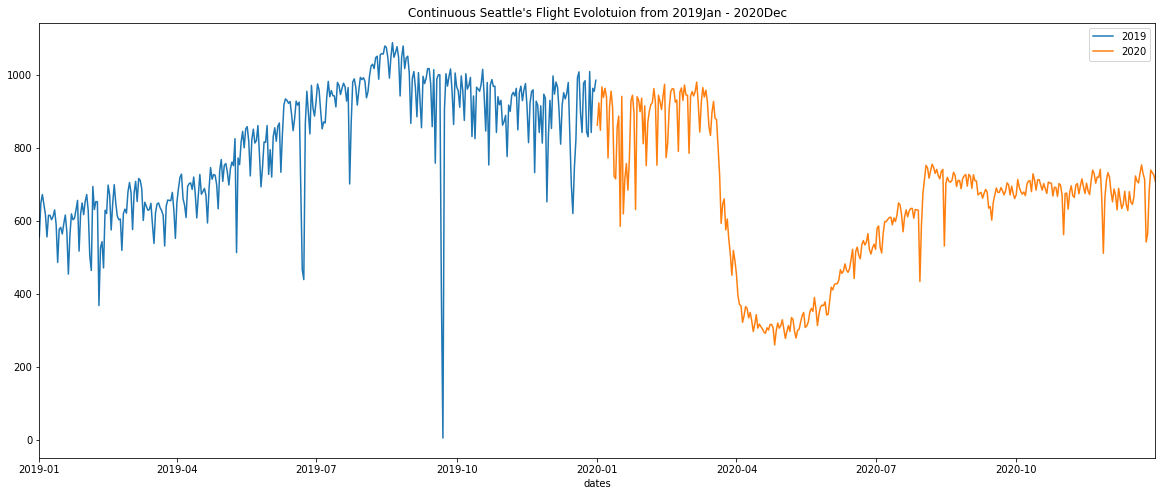

In [47]:
plt.figure(figsize=(20, 8))
metadf[metadf.year==2019].groupby('dates').sum()['count'].plot(label='2019')
metadf[metadf.year==2020].groupby('dates').sum()['count'].plot(label='2020')
plt.legend()
plt.title("Continuous Seattle's Flight Evolotuion from 2019Jan - 2020Dec")

Text(0.5, 1.0, "Seattle's Flight Evolotuion under covid 19")

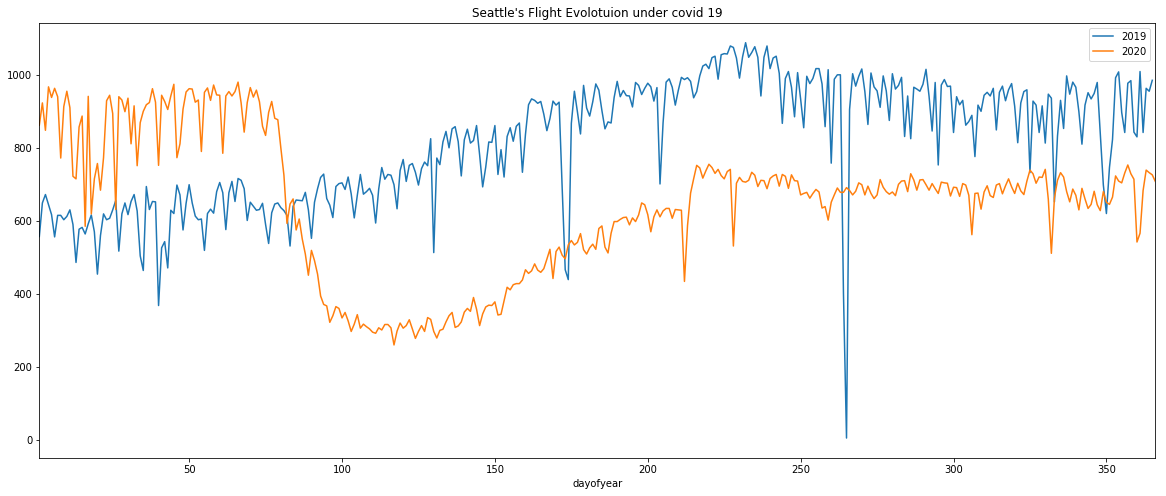

In [46]:
plt.figure(figsize=(20, 8))
metadf[metadf.year==2019].groupby('dayofyear').sum()['count'].plot(label='2019')
metadf[metadf.year==2020].groupby('dayofyear').sum()['count'].plot(label='2020')
plt.legend()
plt.title("Seattle's Flight Evolotuion under covid 19")

In [33]:
df19 = metadf[metadf.year==2019].groupby('origin').sum().sort_values('count', ascending=False).reset_index()[1:6]
df20 = metadf[metadf.year==2020].groupby('origin').sum().sort_values('count', ascending=False).reset_index()[1:6]
df19d = metadf[metadf.year==2019].groupby('destination').sum().sort_values('count', ascending=False).reset_index()[1:6]
df20d = metadf[metadf.year==2020].groupby('destination').sum().sort_values('count', ascending=False).reset_index()[1:6]

In [34]:
compdf1 = pd.DataFrame(columns = ['airport','type','count', 'year'])
compdf1['airport'] = df19.origin
compdf1['type'] = 'o'
compdf1['count'] = df19['count']
compdf1['year'] = 2019
compdf2 = pd.DataFrame(columns = ['airport','type','count', 'year'])
compdf2['airport'] = df20.origin
compdf2['type'] = 'o'
compdf2['count'] = df20['count']
compdf2['year'] = 2020
compdf3 = pd.DataFrame(columns = ['airport','type','count', 'year'])
compdf3['airport'] = df19d.destination
compdf3['type'] = 'd'
compdf3['count'] = df20d['count']
compdf3['year'] = 2019
compdf4 = pd.DataFrame(columns = ['airport','type','count', 'year'])
compdf4['airport'] = df20d.destination
compdf4['type'] = 'd'
compdf4['count'] = df20d['count']
compdf4['year'] = 2020


In [36]:
meta_compdf = pd.concat([compdf1, compdf2, compdf3, compdf4])

Text(0.5, 1.0, 'Top 5 origins of flights to Seattle')

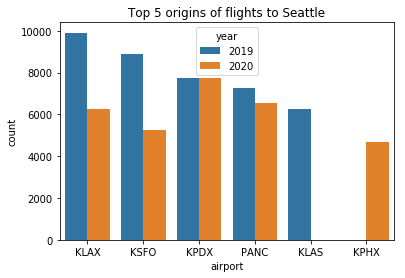

In [49]:
data=meta_compdf[meta_compdf.type=='o']
sns.barplot(data=data, x="airport", y="count", hue="year")
plt.title('Top 5 origins of flights to Seattle')

Text(0.5, 1.0, 'Top 5 destinations of flights from Seattle')

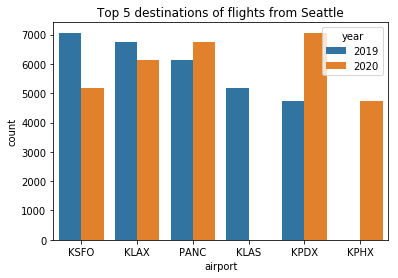

In [50]:
data=meta_compdf[meta_compdf.type=='d']
sns.barplot(data=data, x="airport", y="count", hue="year")
plt.title('Top 5 destinations of flights from Seattle')

## Project Outline :

The data above shows that despite a big drop in flights number around Mar 2020 the trend has stayed quite the same during the yearof 2020 incompare to 2019. However, the top origins of flight to Seattle and the top destinations has changed between 2019 and 2020. More exploratory analysis is needed to determine if these changes are due to covid or other factors such as the decline in flights within a specific airline. By feature engineering and data cleaning, a trend in number of flights can be extracted from these 2 successive years that could predict the flights trend in 2021. 
